In [12]:
import getpass
import os
import chromadb
import chromadb.utils.embedding_functions as embedding_functions
from helpers.api_keys import * 
from helpers.multi_agent import * 
import json
from typing import List, Literal, Optional

import tiktoken
from langchain_community.tools.tavily_search import TavilySearchResults
from langchain_core.documents import Document
from langchain_core.embeddings import Embeddings
from langchain_core.messages import get_buffer_string
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.runnables import RunnableConfig
from langchain_core.tools import tool
from langchain_core.vectorstores import InMemoryVectorStore
from langchain_openai import ChatOpenAI
from langchain_openai.embeddings import OpenAIEmbeddings
from langgraph.checkpoint.memory import MemorySaver
from langgraph.graph import END, START, MessagesState, StateGraph
from langgraph.prebuilt import ToolNode
os.environ["OPENAI_API_KEY"] = get_keys()
from helpers.multi_agent import * 



In [13]:
graph = create_nodes(os.environ["OPENAI_API_KEY"])

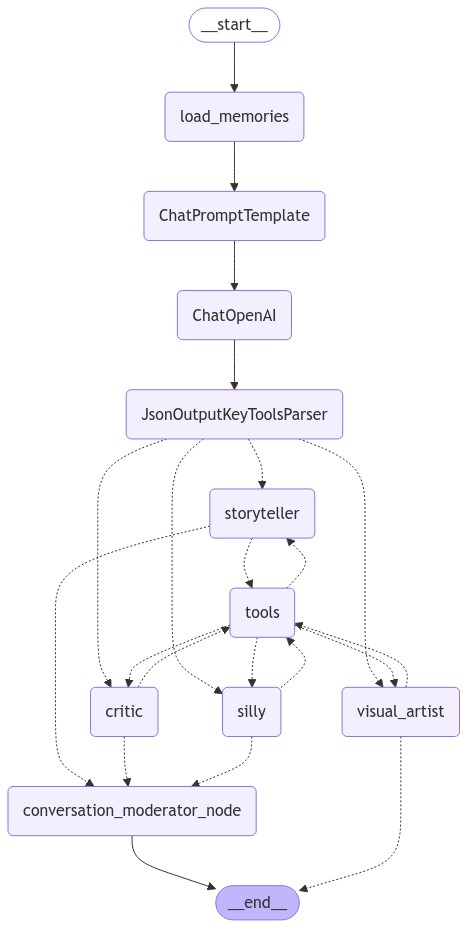

In [14]:
from IPython.display import Image, display

display(Image(graph.get_graph(xray=True).draw_mermaid_png()))

In [4]:
def stream_messages(text: str, thread: dict, image_path: str= None):
    # Initialize the content with the text message
    content = [{"type": "text", "text": text}]

    # If image_url is provided, append the image content
    if image_path:
        base64_image = encode_image(image_path)
        content.append({
            "type": "image_url",
            "image_url": {"url": f"data:image/jpeg;base64,{base64_image}"}
        })

    # Define the input for the graph stream
    input_data = {
        "messages": [
            HumanMessage(content=content)
        ]
    }

        # Initialize a variable to store the final output message
        # Initialize a variable to store the final output message
    final_message = ""

    # Stream the graph and capture only the final message output
    for s in graph.stream(input_data, config=thread):
        print(s)
        if "__end__" not in s:
            # Capture the most recent message (final one)
            final_message = s
            # st.write(final_message)
            
    # Display just the final message
    if 'conversation_moderator_node' in final_message:
        final_message_str = final_message['conversation_moderator_node']['messages'][0].content
        # st.write(final_message_str)
    elif 'visual_artist' in final_message:
        img_url = s['visual_artist']['messages'][0].content
   
        final_message_str = img_url
    else:
        final_message_str = final_message
    
    
    return(final_message)


In [5]:
thread = {"configurable": {"username": "abbyp", "thread_id": "1"}}

In [6]:
stream_messages(
    # graph = graph,
    text="I like the color purple", 
    thread=thread,
    image_path="uploaded_images/family_sketch.jpg"
)

Successfully connected to existing collection
{'load_memories': {'recall_memories': []}}
{'supervisor': {'next': 'visual_artist'}}
{'visual_artist': {'messages': [AIMessage(content="That's great! Purple is a lovely color. Would you like to create a drawing that includes purple? If you have any specific ideas or themes in mind, let me know!", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 36, 'prompt_tokens': 36983, 'total_tokens': 37019, 'completion_tokens_details': {'audio_tokens': None, 'reasoning_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': None, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_9b78b61c52', 'finish_reason': 'stop', 'logprobs': None}, id='run-18a2c876-a604-46b2-a217-16b60ea8fe0e-0', usage_metadata={'input_tokens': 36983, 'output_tokens': 36, 'total_tokens': 37019, 'input_token_details': {'cache_read': 0}, 'output_token_details': {'reasoning': 0}})]}}


{'visual_artist': {'messages': [AIMessage(content="That's great! Purple is a lovely color. Would you like to create a drawing that includes purple? If you have any specific ideas or themes in mind, let me know!", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 36, 'prompt_tokens': 36983, 'total_tokens': 37019, 'completion_tokens_details': {'audio_tokens': None, 'reasoning_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': None, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_9b78b61c52', 'finish_reason': 'stop', 'logprobs': None}, id='run-18a2c876-a604-46b2-a217-16b60ea8fe0e-0', usage_metadata={'input_tokens': 36983, 'output_tokens': 36, 'total_tokens': 37019, 'input_token_details': {'cache_read': 0}, 'output_token_details': {'reasoning': 0}})]}}

In [10]:
stream_messages(
    # graph = graph,
    text="can you help me with shading?", 
    thread=thread,
    # image_path="uploaded_images/family_sketch.jpg"
)

Successfully connected to existing collection
{'load_memories': {'recall_memories': []}}
{'supervisor': {'next': 'critic'}}


KeyError: '__end__'

In [11]:
recall_vector_store = get_vector_store()

Successfully connected to existing collection


In [19]:
recall_vector_store.query(query_texts=["purple"],where={"username": "abbyp"})

{'ids': [[]],
 'embeddings': None,
 'documents': [[]],
 'uris': None,
 'data': None,
 'metadatas': [[]],
 'distances': [[]],
 'included': [<IncludeEnum.distances: 'distances'>,
  <IncludeEnum.documents: 'documents'>,
  <IncludeEnum.metadatas: 'metadatas'>]}